In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn
from sklearn import linear_model

# While language

_awaiting results_

In [33]:
# While 100 runs
df_while = pd.read_csv("../traces/benchmarks/2023_4_28_while_not_better_100_test_without_gc_change.csv")
df_while = df_while[df_while['benchmark_name'].str.startswith("while")]

In [34]:
df_while["bench_x"] = [100, 50, 20, 10, 5, 2, 1] + [0] + [100, 50, 20, 10, 5, 2, 1]

In [35]:
df_while

,benchmark_name,time_per_run_r2,time_per_run_mean,time_per_run_abs_lo_diff,time_per_run_abs_hi_diff,mWd_per_run_r2,mWd_per_run_mean,mWd_per_run_abs_lo_diff,mWd_per_run_abs_hi_diff,mjWd_per_run_r2,...,mGC_per_run_abs_hi_diff,mjGC_per_run_r2,mjGC_per_run_mean,mjGC_per_run_abs_lo_diff,mjGC_per_run_abs_hi_diff,compactions_per_run_r2,compactions_per_run_mean,compactions_per_run_abs_lo_diff,compactions_per_run_abs_hi_diff,bench_x
0,while_fib_program_100_staged,0.940884,3.516879e+08,-3.641512e+07,2.826372e+07,1.0,77694215.0,-1.043081e-07,1.490116e-07,0.999996,...,0.022190,0.999892,11.445556,-0.037105,0.022032,NaN,0.0,0.0,0.0,100
1,while_fib_program_50_staged,0.929279,1.775839e+08,-1.543911e+07,1.640471e+07,1.0,38463420.0,-5.960464e-08,6.705523e-08,0.999997,...,0.021854,0.999642,5.561111,-0.034669,0.022380,NaN,0.0,0.0,0.0,50
2,while_fib_program_20_staged,0.953386,6.365830e+07,-5.144635e+06,4.515511e+06,1.0,15002757.0,-2.235174e-08,2.793968e-08,0.999982,...,0.026818,0.998433,2.134444,-0.028925,0.018755,NaN,0.0,0.0,0.0,20
3,while_fib_program_10_staged,0.935419,2.578006e+07,-1.851345e+06,2.141787e+06,1.0,7191147.0,-1.024455e-08,1.303852e-08,0.999736,...,0.015078,0.982622,0.983333,-0.031783,0.013092,NaN,0.0,0.0,0.0,10
4,while_fib_program_5_staged,0.905837,1.531361e+07,-1.168733e+06,1.279556e+06,1.0,3286366.0,-5.122274e-09,5.587935e-09,0.999932,...,0.016383,0.956876,0.394444,-0.022620,0.019540,NaN,0.0,0.0,0.0,5
5,while_fib_program_2_staged,0.710876,3.042319e+06,-2.727102e+05,5.486048e+05,1.0,943579.0,-1.396984e-09,1.746230e-09,0.999527,...,0.023428,0.437879,0.051111,-0.032775,0.021325,NaN,0.0,0.0,0.0,2
6,while_fib_program_1_staged,0.724386,8.900483e+05,-1.158562e+05,1.812798e+05,1.0,198134.0,-3.201421e-10,3.201421e-10,0.978093,...,0.020269,NaN,0.000000,0.000000,0.000000,NaN,0.0,0.0,0.0,1
7,while_fib_program_compile,0.915567,4.170984e+06,-2.231576e+05,3.365359e+05,1.0,1011490.0,-1.513399e-09,1.862645e-09,0.999725,...,0.031263,0.914045,0.286667,-0.027039,0.024617,NaN,0.0,0.0,0.0,0
8,while_fib_program_100_run,0.977942,6.373052e+08,-3.335961e+07,3.414961e+07,1.0,133081424.0,-1.937151e-07,2.533197e-07,0.999996,...,0.029394,0.999935,26.653333,-0.035180,0.032072,NaN,0.0,0.0,0.0,100
9,while_fib_program_50_run,0.953953,3.203812e+08,-2.001747e+07,2.471369e+07,1.0,66119179.0,-8.940697e-08,1.117587e-07,0.999997,...,0.021307,0.999961,13.263333,-0.025323,0.022490,NaN,0.0,0.0,0.0,50


In [62]:
def plot_one(ax, to_plot, color, ecolor, fill_color, label, fmt="x--", fill_between=True, metric='time_per_run'):
    y_col = metric + '_mean'
    lo_err_col = metric + '_abs_lo_diff'
    hi_err_col = metric + '_abs_hi_diff'
    x = to_plot['bench_x']
    y = to_plot[y_col]
    lo_err = to_plot[lo_err_col]
    hi_err = to_plot[hi_err_col]
    error = [-lo_err, hi_err]
    if fill_between:
        ax.fill_between(x, y + lo_err, y + hi_err, color=fill_color)
    ax.errorbar(x, y, yerr=error, fmt=fmt, color=color, ecolor=ecolor, label=label)

def plot_info_for_axs(df, title, axs, linreg = True, log_scale=False, has_compile=True):
    # Setup
    # Assumes existence of bench_x column
    # fig, axs = plt.subplots(3, 1, figsize=(15, 20))

    staged = df[df['benchmark_name'].str.endswith('staged')][['benchmark_name', 'bench_x', 'time_per_run_mean', 'time_per_run_abs_lo_diff', 'time_per_run_abs_hi_diff']]
    run = df[df['benchmark_name'].str.endswith('run')][['benchmark_name', 'bench_x', 'time_per_run_mean', 'time_per_run_abs_lo_diff', 'time_per_run_abs_hi_diff']]

    # Initial analysis
    plot_one(axs[0], staged, "blue", "black", "#e3e1de", "Compiled: $t_{p_s}(d)$")
    plot_one(axs[0], run, "orange", "black", "#e3e1de", "Interpreted: $t_p(s, d)$")
    axs[0].legend()
    axs[0].set_xlabel("Dynamic Input d")
    axs[0].set_ylabel("Runtime (ns)")
    if log_scale:
        axs[0].set_yscale('log', nonposy='clip')
    # plt.plot(x, y, 'x--', color='blue', label="time/run for staged fib")
    axs[0].set_title(f"{title}: Time/run")

    # Ratio

    joined = staged.join(run.set_index('bench_x'), on="bench_x", lsuffix="_staged", rsuffix="_run")
    joined = joined[joined['benchmark_name_staged'].str[:-6] == joined['benchmark_name_run'].str[:-3]]

    axs[1].plot(joined['bench_x'], joined['time_per_run_mean_run']/joined['time_per_run_mean_staged'], "x--")
    for i,j in zip(joined['bench_x'], joined['time_per_run_mean_run']/joined['time_per_run_mean_staged']):
        axs[1].annotate(str(round(j, 2)),xy=(i,j))

    axs[1].set_xlabel("Dynamic Input d")
    axs[1].set_ylabel("Runtime ratio")
    axs[1].set_title(title +": Ratio of speedup: $t_p(s, d)/t_{p_s}(d)$")

    # Compile + run VS just run
    if has_compile:
        peval = df[df['benchmark_name'].str.endswith('compile')][['bench_x', 'time_per_run_mean', 'time_per_run_abs_lo_diff', 'time_per_run_abs_hi_diff']].iloc[0]
        new_staged = (peval + staged).append(peval)
        new_run = run # pd.concat([run, pd.DataFrame([[0, 0, 0, 0]], columns=['bench_x', 'time_per_run_mean', 'time_per_run_abs_lo_diff', 'time_per_run_abs_hi_diff'])]) 

        if linreg:
            plot_one(axs[2], new_staged, "blue", "black", "#e3e1de", "Combined run time of the staged version", fmt='.', fill_between=False)
            plot_one(axs[2], new_run, "orange", "black", "#e3e1de", "Combined run time of the non staged version", fmt='.', fill_between=False)

            model_staged = linear_model.LinearRegression()
            model_staged.fit(np.array(new_staged['bench_x']).reshape(-1, 1), new_staged['time_per_run_mean'])
            model_run = linear_model.LinearRegression()
            model_run.fit(np.array(new_run['bench_x']).reshape(-1, 1), new_run['time_per_run_mean'])

            X = np.linspace(0, 100).reshape(-1, 1)
            y_staged = model_staged.predict(X)
            y_run = model_run.predict(X)
            axs[2].plot(X, y_staged, "-", color="cyan", label="Linear model for the combined run time of the staged version")
            axs[2].plot(X, y_run, "-", color="#f7b713", label="Linear model for the run time of the non staged version")

            x_intersection = (model_run.intercept_-model_staged.intercept_) / (model_staged.coef_[0] - model_run.coef_[0])
            y_intersection = model_staged.predict([[x_intersection]])[0]
            axs[2].plot(x_intersection, y_intersection, "o", color="red", label="Intersection between the execution time of compile + run and interpret")
            axs[2].annotate(str((round(x_intersection, 2), round(y_intersection, 2))), xy=(x_intersection, y_intersection))
        else:
            plot_one(axs[2], new_staged, "blue", "black", "#e3e1de", "Combined run time of the staged version", fmt='.--', fill_between=False)
            plot_one(axs[2], new_run, "orange", "black", "#e3e1de", "Combined run time of the non staged version", fmt='.--', fill_between=False)
        axs[2].legend()
        axs[2].set_xlabel("Dynamic Input d")
        axs[2].set_ylabel("Runtime (ns)")
        axs[2].set_title(f"{title}: Time/run: Unstaged VS Code Gen + Evaluating the generated code")

    # plt.show()

def plot_info_for(df, title, linreg=True, log_scale=False, has_compile=True):
    fig, axs = plt.subplots(3, 1, figsize=(15, 20))
    plot_info_for_axs(df, title, axs, linreg, log_scale=log_scale, has_compile=has_compile)
    plt.show()


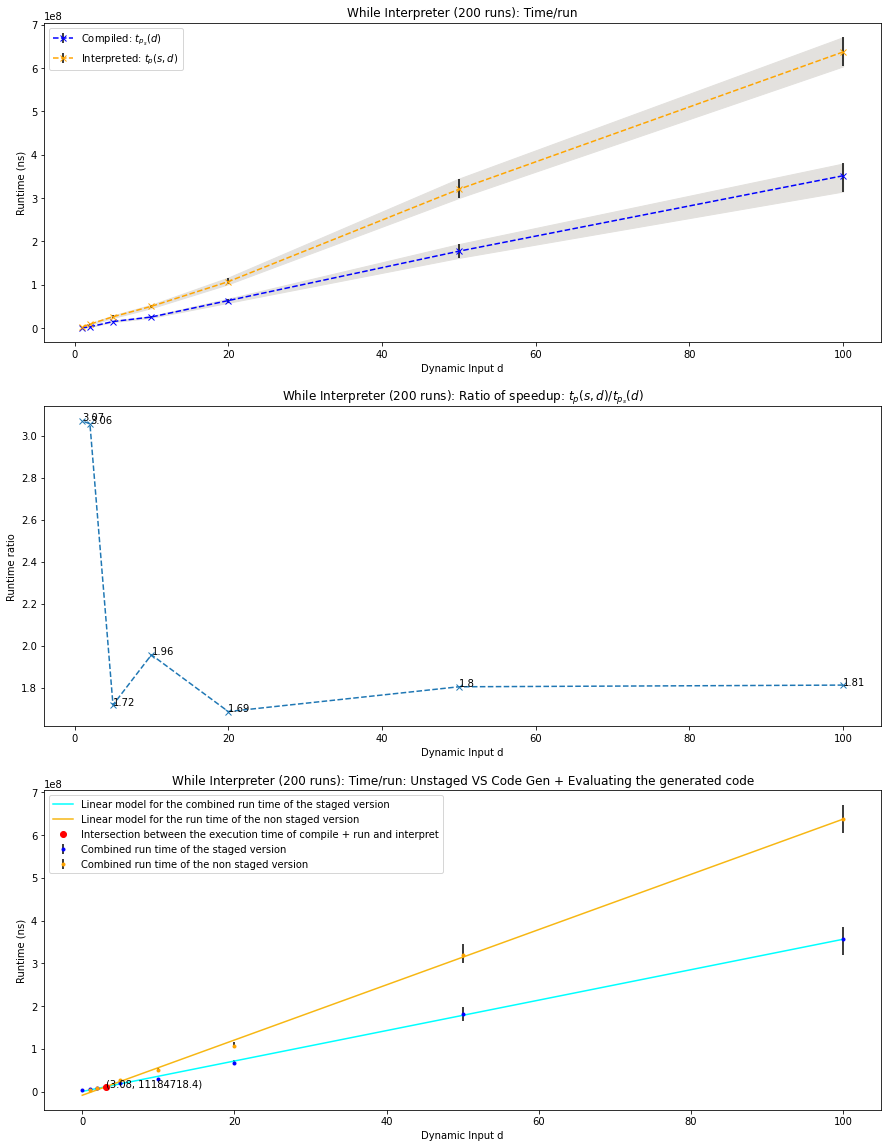

In [63]:
plot_info_for(df_while, "While Interpreter (200 runs)")